### Task 2 - Prediction using Unsupervised ML
#### by Shivam Chauhmaal

In [22]:
# Import libraries

import numpy as np
import matplotlib.pyplot as plt


import pandas as pd
# Load the iris dataset

iris_df = pd.read_csv("D:/GRIP/Task 2 - Prediction using Unsupervised ML/Iris.csv")
iris_df.head(5) 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### How do you find the optimum number of clusters for K Means? How does one determine the value of K?

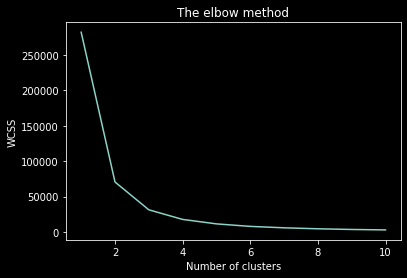

In [23]:
# Finding the optimum number of clusters for k-means classification

x = iris_df.iloc[:, [0, 1, 2, 3]].values

#reference: https://scikit-learn.org/stable/modules/clustering.html#clustering
from sklearn.cluster import KMeans

#creating a container for all "within-cluster sum-of-squares"/wcss to come
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)



    
# Plotting the results onto a line graph, 

# https://matplotlib.org/stable/gallery/style_sheets/dark_background.html
plt.style.use('dark_background')

# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as ** '3**'.

In [24]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

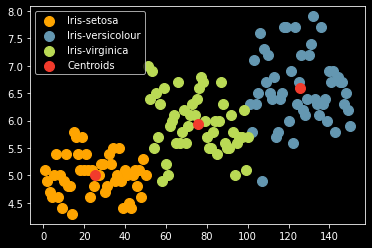

In [25]:
# Visualising the clusters - On the first two columns

plt.style.use('dark_background') # https://matplotlib.org/stable/gallery/style_sheets/dark_background.html


plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s=100, c='#ffa500', label='Iris-setosa')

#similarly
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s=100, c='#6497b1', label='Iris-versicolour')

plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s=100, c='#bada55', label='Iris-virginica')



# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s=100, c='#f23b2c', label='Centroids')

plt.legend()